# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import statsmodels.api as sm





X = [17,51,27,21,36,48,19,26,54,30]
Y = [10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'age': X, 'tardies': Y})

In [2]:
student_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

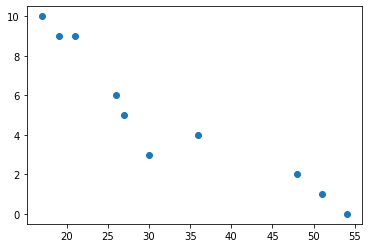

In [3]:
# Dispersion diagram (scatter plot) for the data.
plt.scatter(X,Y)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?


""" 
We can see a trend looking like a negative correlation. 
Hypothesis : negative correlation between age and number of tardies 

"""

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Covariance of the variables in the plot.
np.cov(student_data['age'],student_data['tardies'])

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [5]:
# Correlation of the variables in the plot.

np.corrcoef(student_data['age'],student_data['tardies'])

array([[ 1.        , -0.93916269],
       [-0.93916269,  1.        ]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# add a constant to x to include the intercept in the regression
X = sm.add_constant(X)

# fit the regression model
model = sm.OLS(Y, X)
results = model.fit()

# print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           5.57e-05
Time:                        16:51:54   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


"""

The results of the simple linear regression model show that the age variable has a significant negative impact 
on the number of tardies, as indicated by the negative coefficient. 
This supports the hypothesis of a negative correlation between age and number of tardies.

"""

Plot your regression model on your scatter plot.

In [7]:
# Your code here.

print(results.params)

[12.88880336 -0.24282077]


In [8]:
predictions = results.predict(X)
predictions

array([ 8.76085026,  0.50494405,  6.33264255,  7.78956717,  4.14725561,
        1.23340636,  8.27520872,  6.57546332, -0.22351827,  5.60418024])

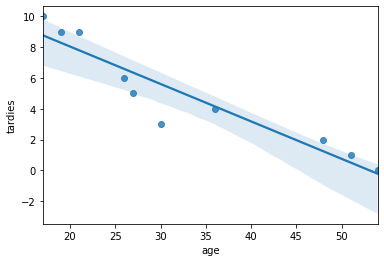

In [9]:
sns.regplot(x="age", y="tardies", data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

# Your response here. 

The results of the model show that the age variable has a significant negative impact on the number of tardies, as indicated by the negative coefficient (-0.24).

The R-squared value of 0.882 indicates that the model explains about 88.2% of the variability in the number of tardies.

The scatter plot with the regression line shows that the regression line fits the data points well and captures the negative relationship between age and number of tardies.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [34]:
# Import any libraries you may need & the data

df = pd.read_csv('vehicles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [35]:
# Selecting the columns. 

df = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     35952 non-null  int64  
 1   Cylinders                35952 non-null  float64
 2   Fuel Barrels/Year        35952 non-null  float64
 3   Combined MPG             35952 non-null  int64  
 4   Fuel Cost/Year           35952 non-null  int64  
 5   CO2 Emission Grams/Mile  35952 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.6 MB


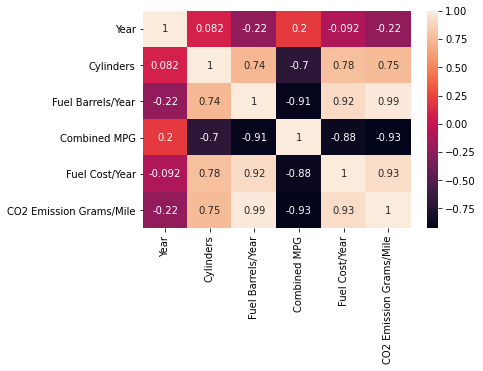

In [36]:
sns.heatmap(df.corr(),annot=True)

# Comment
Based on the correlations matrix and heatmap, I think "Fuel Barrels/Year" will be the most important in determining CO2 emissions as it has a high positive correlation with the outcome variable. On the other hand, "Year" provides the least amount of helpful information for determining CO2 emissions as it has a low correlation with the outcome variable.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [37]:
# Your response here. 

# Importing the necessary libraries
import statsmodels.api as sm

# Adding a constant to the dataframe
df = sm.add_constant(df)

# Splitting the data into dependent and independent variables
X = df.drop('CO2 Emission Grams/Mile', axis=1)
y = df['CO2 Emission Grams/Mile']

# Building the regression model
model = sm.OLS(y, X).fit()

# Printing the summary of the model
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                             17:31:27   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [14]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [15]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [16]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [17]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [18]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [19]:
# Your response here. 